In [92]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [93]:
data = pd.read_csv('C:\\Users\\akshay gera\\Final Projects for Github\\Sentiment Analysis\\Drug-Reviews-Sentiment-Analysis\\drugLibTrain_raw.tsv',  sep='\t', header=0)

In [94]:
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Observation

First column name is undefined in the source dataset

In [95]:
# Renaming first column as usefulCount which comes from the UCI website where source data description is mentioned

data.rename(columns={'Unnamed: 0': "usefulCount"}, inplace=True)
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


# Data Exploration

In [96]:
# Checking dimensions of the data

data.shape

(3107, 9)

In [97]:
# Checking descriptive statistics of numerical variables

data.describe()

,usefulCount,rating
count,3107.000000,3107.000000
mean,2080.607016,7.006115
std,1187.998828,2.937582
min,0.000000,1.000000
25%,1062.500000,5.000000
50%,2092.000000,8.000000
75%,3092.500000,9.000000
max,4161.000000,10.000000


<AxesSubplot:ylabel='usefulCount'>

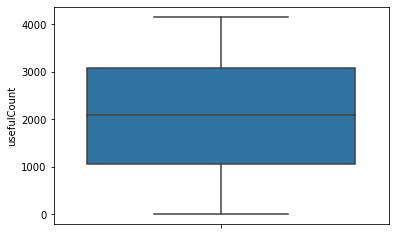

In [98]:
# Boxplotting useful count variable to check distribution

sns.boxplot(y='usefulCount', data= data)

<AxesSubplot:ylabel='rating'>

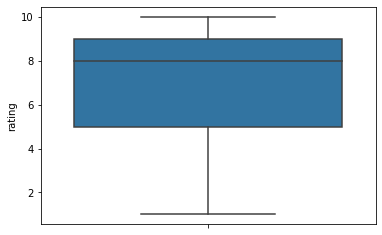

In [99]:
# Boxplotting drug rating provided by consumers to check distribution


sns.boxplot(y='rating', data= data)

## Observation

On an average, the comments we have in our data are having useful count at 2080, which means we are analysing comments which many people find useful and are geniune.

Rating for the medicines are also distributed between 5 to 9 and hence we see both experiences of consumers, good and bad.

<AxesSubplot:>

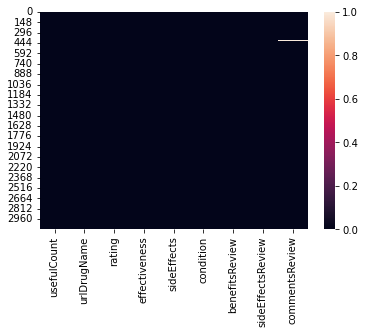

In [100]:
# Checking missing values in the dataset

sns.heatmap(data.isnull())

### Observation

We find some missing values in Comments Review column

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   usefulCount        3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [102]:
# Removing Missings values from commentsReview, condition and sideEffectsReview column since they are not significant in count

data = data[data['commentsReview'].notnull()]
data = data[data['condition'].notnull()]
data = data[data['sideEffectsReview'].notnull()]


In [103]:
# Checking data info for changes

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   usefulCount        3096 non-null   int64 
 1   urlDrugName        3096 non-null   object
 2   rating             3096 non-null   int64 
 3   effectiveness      3096 non-null   object
 4   sideEffects        3096 non-null   object
 5   condition          3096 non-null   object
 6   benefitsReview     3096 non-null   object
 7   sideEffectsReview  3096 non-null   object
 8   commentsReview     3096 non-null   object
dtypes: int64(2), object(7)
memory usage: 241.9+ KB


## Data Preparation for Text Analytics

In [104]:
# Since we are going to perform all the data preparation on all three review columns, we are creating a list of column names 
# This list will be used to iterate for loops for making changes in all three columns together 

reviews_list = ['commentsReview', 'benefitsReview', 'sideEffectsReview']

In [105]:
# Lowercasing all three type of reviews columns through a for loop

for review_type in reviews_list:
    data[review_type] = data[review_type].apply(lambda x: " ".join(x.lower() for x in x.split()))

data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","i hate this birth control, i would not suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,i took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...",i was given prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey. could not ...,see above


In [106]:
# Removing Punctuations from the text

for review_type in reviews_list:
    data[review_type] = data[review_type].str.replace('[^\w\s]','')

data.head()

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_12144/2322345681.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data[review_type] = data[review_type].str.replace('[^\w\s]','')


,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight and asses for r...
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,heavy cycle cramps hot flashes fatigue long la...,i hate this birth control i would not suggest ...
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal,i took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,constipation dry mouth and some mild dizziness...,i was given prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey could not d...,see above


In [108]:
# Counting number of words in of review columns and creating new columns

for review_type in reviews_list:
    data[f'{review_type}_Word_Count'] = data[review_type].apply(lambda x: len(str(x).split(" ")))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,monitor blood pressure weight and asses for r...,11,26,26
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,heavy cycle cramps hot flashes fatigue long la...,i hate this birth control i would not suggest ...,12,32,45
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal,i took 2 pills at the onset of my menstrual cr...,76,46,6
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,constipation dry mouth and some mild dizziness...,i was given prilosec prescription at a dose of...,27,117,19
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey could not d...,see above,2,21,27


In [113]:
# In order to focus our analysis to relavant words we are removing stop words from the reviews columns

from nltk.corpus import stopwords
stop = stopwords.words('english')

for review_type in reviews_list:
    data[review_type] = data[review_type].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Checking sample out of one of our review columns
data.commentsReview.head()


0    monitor blood pressure weight asses resolution...
1              hate birth control would suggest anyone
2    took 2 pills onset menstrual cramps every 812 ...
3    given prilosec prescription dose 45mg per day ...
4                                                  see
Name: commentsReview, dtype: object

In [114]:
# Updating our reviews word count number after removing the stop words and creating new columns

for review_type in reviews_list:
    data[f'{review_type}_Word_Count'] = data[review_type].apply(lambda x: len(str(x).split(" ")))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control would suggest anyone,6,16,29
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,took 2 pills onset menstrual cramps every 812 ...,43,25,4
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per day ...,16,55,11
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16


## Observation

We observe a significant reduction in the number of words in our reviews column. This filtered out text is more menaingful for further analytical process

## Focusing Research Towards General Comments of Customers

### From here onwards we are performing text analytics only on CommentsReview column which contains general feedback of the drug provided by the consumer

In [116]:
!pip install textblob

In [117]:
# importing libraries for tokenizing text through TextBlob  

from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\akshay
[nltk_data]     gera\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [123]:
# Tokenizing bag of words of comments review column and displaying first 10 words from the whole bag

tokenized_reviews = TextBlob(' '.join(data['commentsReview'])).words
tokenized_reviews[:10]

WordList(['monitor', 'blood', 'pressure', 'weight', 'asses', 'resolution', 'fluid', 'hate', 'birth', 'control'])

In [124]:
# Checking frequency of the tokenized words and picking up 20 most common words

most_freq = pd.Series(' '.join(data['commentsReview']).split()).value_counts()[:20]
most_freq

day           1169
take          1129
one            704
taking         697
mg             606
drug           548
took           543
medication     498
treatment      491
would          477
effects        475
side           463
days           458
daily          447
doctor         432
prescribed     427
pain           427
time           424
years          420
pill           418
dtype: int64

In [125]:
# In our effort to normalize the freequency distribution of the words, we would want to remove common most occuring words
# Removing these common words as they will not be much useful for analysis

data['commentsReview'] = data['commentsReview'].apply(lambda x: " ".join(x for x in x.split() if x not in most_freq))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control suggest anyone,6,16,29
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,2 pills onset menstrual cramps every 812 hours...,43,25,4
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per take...,16,55,11
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16


In [126]:
# Updating our reviews word count number after removing the stop words and creating new columns

data['commentsReview_Word_Count'] = data['commentsReview'].apply(lambda x: len(str(x).split(" ")))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control suggest anyone,5,16,29
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,2 pills onset menstrual cramps every 812 hours...,36,25,4
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per take...,13,55,11
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16


In [139]:
# Checking frquency of the bottom most less frequent occuring words

pd.Series(' '.join(data['commentsReview']).split()).value_counts()[-10000:]

every        415
2            391
started      380
months       377
dose         365
            ... 
irrigated      1
mediaxal       1
wuse           1
ailment        1
aarp           1
Length: 9493, dtype: int64

Wordcloud of All the Rows (With Stopwords)


In [140]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [131]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

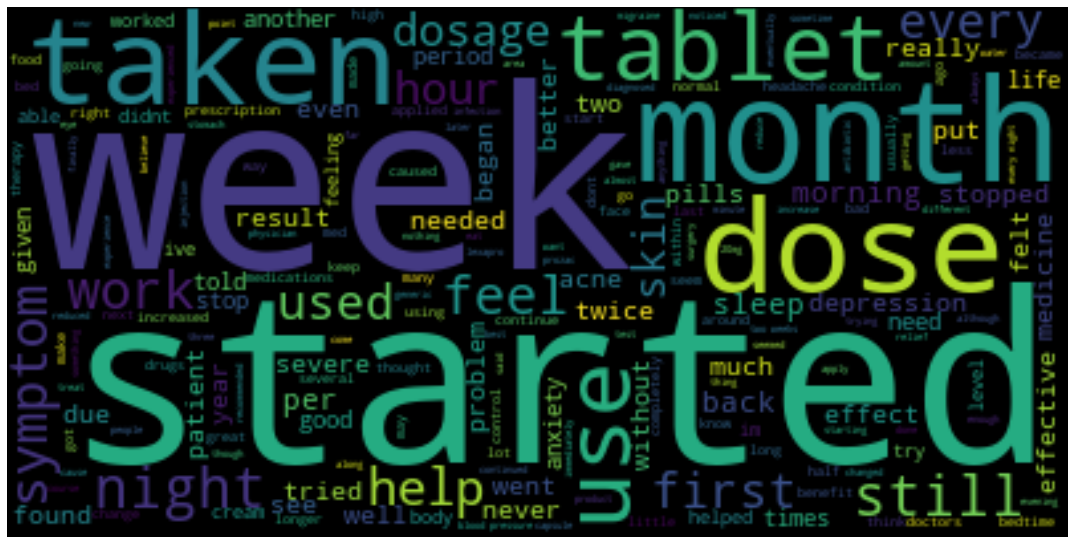

In [135]:
wordcloud = WordCloud().generate(' '.join(data['commentsReview']))

# Display the generated image:
plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
#Creating a column Polarity which has the polarity measurement of the comments

data['commentsReview_Polarity'] = data['commentsReview'].map(lambda text: TextBlob(text).sentiment.polarity)
data

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count,commentsReview_Polarity
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19,0.000000
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control suggest anyone,5,16,29,-0.800000
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,2 pills onset menstrual cramps every 812 hours...,36,25,4,-0.052381
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per take...,13,55,11,0.000000
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,increased focus attention productivity better ...,restless legs night insomnia headache sometime...,adderall child made miserable never wanted con...,48,27,26,0.261111
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,emotions somewhat blunted less moodiness,weight gain extreme tiredness day insomnia nig...,zoloft 2 total extremely sensitive started dos...,171,5,14,-0.043226
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,,constant issues patch staying called manufactu...,,1,1,69,0.000000
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,controlled complex partial seizures,dizziness fatigue nausea,started 2 doses 300 worked 4 doses per six mon...,22,4,3,-0.050000


In [142]:
# Randomly checking 5 super negative reviews to cross check with the polarity score

print('5 random reviews with the highest negative sentiment polarity: \n')
cl = data.loc[data.commentsReview_Polarity < -0.5, ['commentsReview']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

ongoing yeast infection go away dr trying med terrible pharmacist said use perfume mouthwash anything type alcohol makes much worse dont use things said discontinue use contact physician
awful thats
dealth awkward taste counter suppositories yeast infection
horrible way long
cream applied bedtime five nights week basal cell carcinoma three night per week actinic keratosis eight weeks row end eight weeks bad cells react gradually scabby spots know medicine working put cream spots tells inch margin around


In [185]:
# Extracting most commented drug types garnering more than 20 comments

drug_comments_freq = data.urlDrugName.value_counts().to_frame()
most_commented_drugs = drug_comments_freq[drug_comments_freq['urlDrugName'] > 20]
most_commented_drugs.style.bar()

,urlDrugName
lexapro,63
prozac,46
zoloft,45
retin-a,45
propecia,38
paxil,38
synthroid,38
effexor,33
cymbalta,33
chantix,32


<AxesSubplot:xlabel='sideEffects', ylabel='commentsReview_Polarity'>

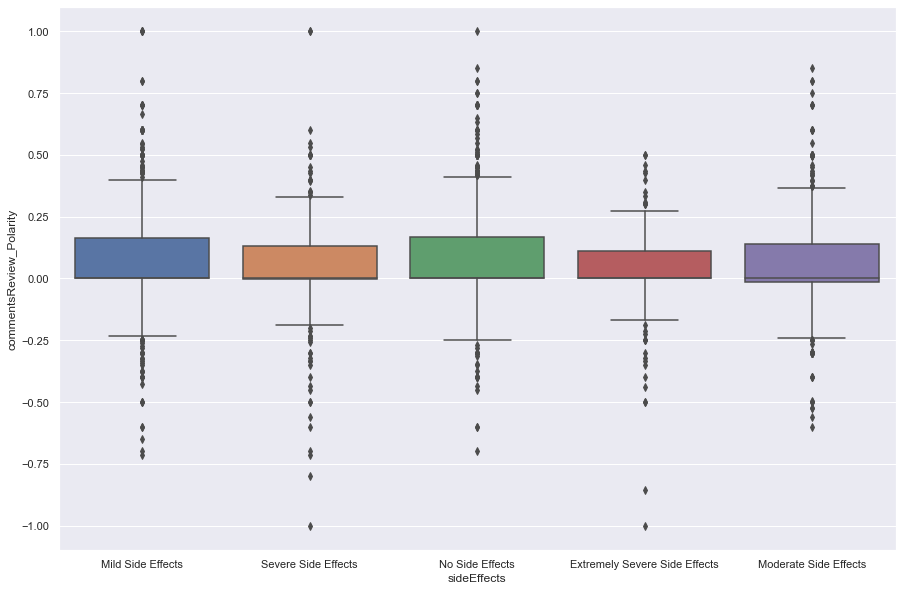

In [186]:
# Comparison of distrbution of polarity of comments categorized by the drug's side effects

sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x=data['sideEffects'],y=data['commentsReview_Polarity'])

## Observation

We observing a general trend of 75% of data staying in polarity range between 0 and 0.2 (mostly positive) across all the category of side effects.
We could say that mostly the reviews about drugs have been either neautral or positive.
Drugs with Severe Side Effects have majority outliers at negative polairty

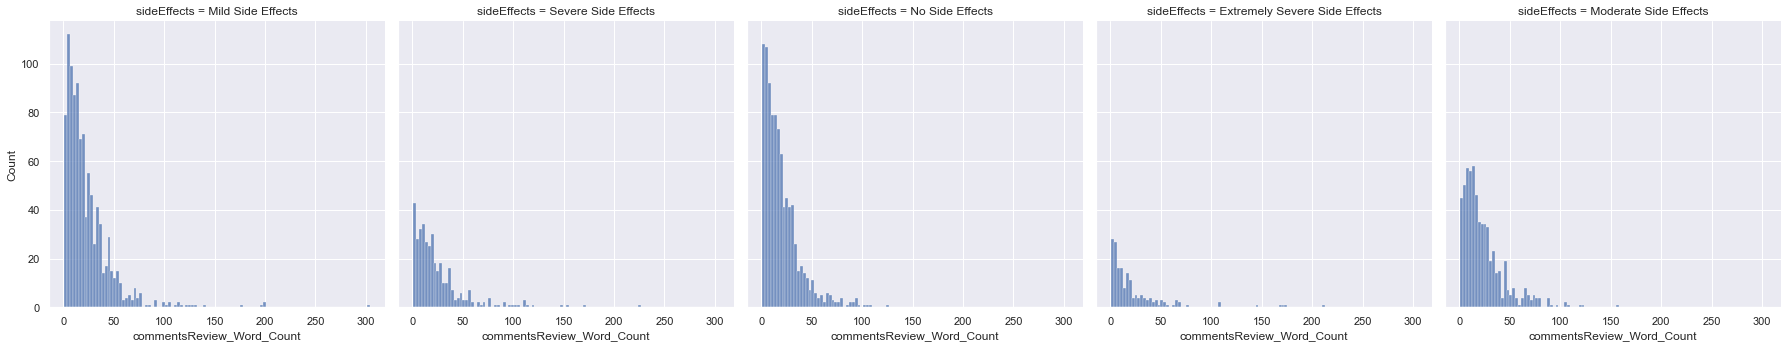

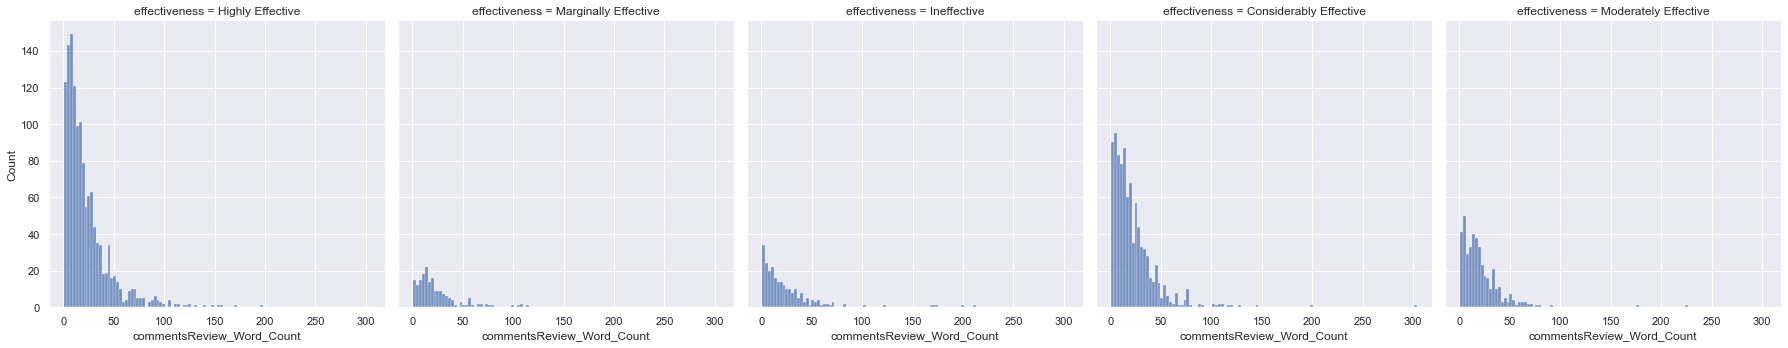

In [187]:
# Visualizing distribution of word count of the comments for different side effects and drug effectiveness

sns.displot(data['commentsReview_Word_Count'], x=data['commentsReview_Word_Count'] , col= data['sideEffects'])
sns.displot(data['commentsReview_Word_Count'], x=data['commentsReview_Word_Count'] , col= data['effectiveness'])

## Observation

The distribution is right skewed, also called as Zipf Distribution. The word count of the comments for both categories (drug effectivness and drug's side effects) ranges from 0 to 50. Majority of customers express their reviews about the drug in 50 words and reviews with high word count occurs infrequently.

Drugs with Mild Side Effects and No Side Effects have more people commenting maybe since these must be used by many.
Highly Effective drugs also attracts people's comments more.

<AxesSubplot:xlabel='commentsReview_Polarity', ylabel='commentsReview_Word_Count'>

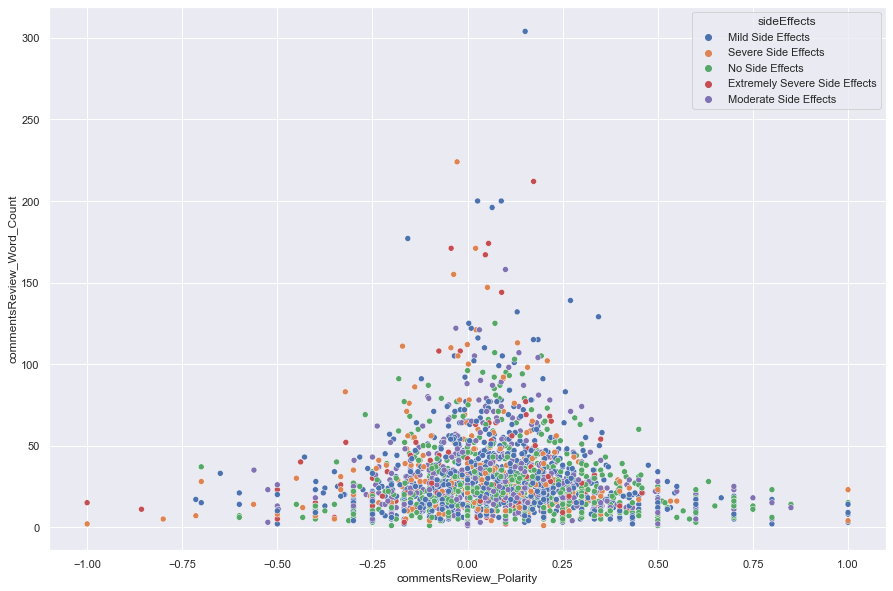

In [189]:
# Scatterplot of Word count and polarity acrross various categories of side effects

sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(y=data['commentsReview_Word_Count'],x=data['commentsReview_Polarity'],hue=data['sideEffects'])


## Observation

A scatter plot between word count and polarity of reviews visualizes a non-liner relationship between the two vairables, which means that polarity of reviews can come in any number of words (it could be higher polarity in fewer words and vice-versa)
The plot also enables us to visualize how the distribution of polarity looks like for reviews with word count greater than 50 words (the majority of reviewer word count) Reviews with word count over 50 are evenly distributed between -0.25 and 0.25 polarity.

<AxesSubplot:xlabel='rating', ylabel='commentsReview_Polarity'>

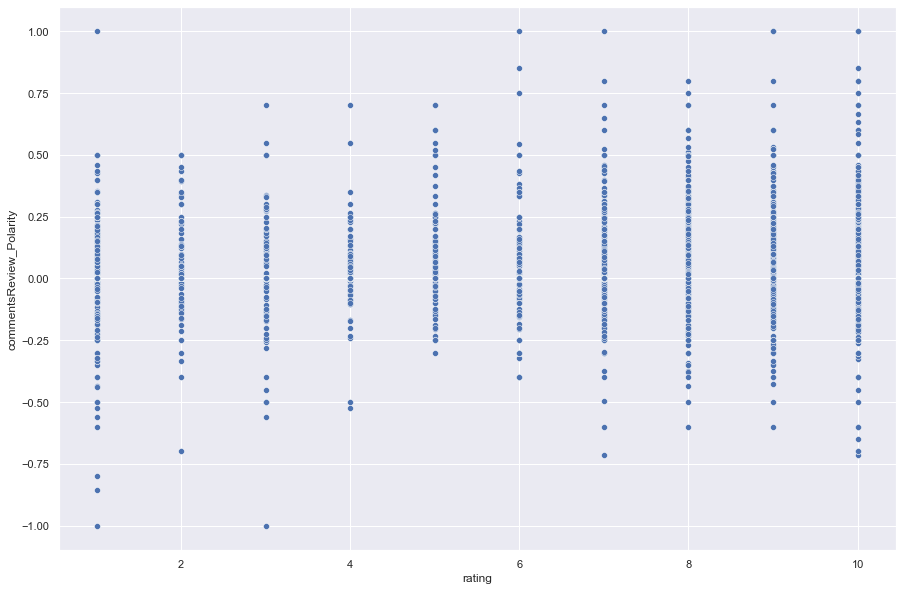

In [192]:
sns.scatterplot(x='rating', y='commentsReview_Polarity', data= data)

In [195]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\akshay
[nltk_data]     gera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [198]:
# Trhough vader package of nltk we are trying to comeup with qualitative sentiment of the reviews, whether it was positive or negative

data['scores'] = data['commentsReview'].apply(lambda review: sid.polarity_scores(review))
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count,commentsReview_Polarity,scores
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19,0.000000,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control suggest anyone,5,16,29,-0.800000,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,2 pills onset menstrual cramps every 812 hours...,36,25,4,-0.052381,"{'neg': 0.189, 'neu': 0.705, 'pos': 0.106, 'co..."
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per take...,13,55,11,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [199]:
# We are intersted in extracting compound scores of the reviews which is relevant for our analysis

data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count,commentsReview_Polarity,scores,compound
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19,0.000000,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",-0.2960
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control suggest anyone,5,16,29,-0.800000,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.5719
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,2 pills onset menstrual cramps every 812 hours...,36,25,4,-0.052381,"{'neg': 0.189, 'neu': 0.705, 'pos': 0.106, 'co...",-0.5106
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per take...,13,55,11,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [200]:
# Labelling the compund score, if it is above 0 then positive else negative

data['Compund_Score_Type'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
data.head()

,usefulCount,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,commentsReview_Word_Count,benefitsReview_Word_Count,sideEffectsReview_Word_Count,commentsReview_Polarity,scores,compound,Compund_Score_Type
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight asses resolution...,7,16,19,0.000000,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",-0.2960,neg
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control cons pros help cra...,heavy cycle cramps hot flashes fatigue long la...,hate birth control suggest anyone,5,16,29,-0.800000,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.5719,neg
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramps badly would leave balled bed least...,heavier bleeding clotting normal,2 pills onset menstrual cramps every 812 hours...,36,25,4,-0.052381,"{'neg': 0.189, 'neu': 0.705, 'pos': 0.106, 'co...",-0.5106,neg
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away months days drug heartbu...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose 45mg per take...,13,55,11,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see,1,8,16,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [201]:
# Checking how the distribution looks like

data['Compund_Score_Type'].value_counts()

pos    2109
neg     987
Name: Compund_Score_Type, dtype: int64